Installations

In [ ]:
!pip install pandas scikit-learn gensim


Packages

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel

Loading Excel and filtering columns

In [ ]:
# Load both CSV files
file_path_2021 = '/content/hatetoxic_2021.csv'
file_path_2223 = '/content/hatetoxic_2223.csv'

# Read each file into a DataFrame
df_2021 = pd.read_csv(file_path_2021)
df_2223 = pd.read_csv(file_path_2223)

# Keep only the specified columns
columns_to_keep = [
    'text without punctuation and stopword', 'subreddit_id', 'moderation', 'year', 'month',
    'subreddit_name', 'hate_label', 'toxic_label'
]
df_2021 = df_2021[columns_to_keep]
df_2223 = df_2223[columns_to_keep]

# Combine both DataFrames
df = pd.concat([df_2021, df_2223], ignore_index=True)

# Display the first few rows to verify
print(df.head())


               text without punctuation and stopword subreddit_id  \
0                                 manually suck dust     t5_2qh8c   
1  moral high ground easy realise shame entail le...     t5_2qh8c   
2    assume area botanical garden dinosaur shit gone     t5_2qh8c   
3  want nanny state everything admit mistake shit...     t5_2qh8c   
4  making fun short people exactly singaporean gl...     t5_2qh8c   

                                          moderation  year  month  \
0  {'collapsed_reason_code': None, 'collapsed_rea...  2021      7   
1  {'removal_reason': None, 'collapsed': False, '...  2020      3   
2  {'removal_reason': None, 'collapsed': False, '...  2020     10   
3  {'collapsed_reason': None, 'author_is_blocked'...  2021      5   
4  {'removal_reason': None, 'collapsed': False, '...  2020      1   

  subreddit_name hate_label toxic_label  
0    r/Singapore   NOT-HATE       toxic  
1    r/Singapore       HATE     neutral  
2    r/Singapore   NOT-HATE       toxic  
3 

Filtering by year

In [ ]:
# Get the unique years from the filtered DataFrame
years = df['year'].unique()

# Create separate DataFrames for each year
for year in years:
    globals()[f'df_{year}'] = df[df['year'] == year]

print(df_2020.head())

               text without punctuation and stopword subreddit_id  \
1  moral high ground easy realise shame entail le...     t5_2qh8c   
2    assume area botanical garden dinosaur shit gone     t5_2qh8c   
4  making fun short people exactly singaporean gl...     t5_2qh8c   
6  want n scraped study pretty think saf contagio...     t5_2qh8c   
7  hougang likely alr counted result close need r...     t5_2qh8c   

                                          moderation  year  month  \
1  {'removal_reason': None, 'collapsed': False, '...  2020      3   
2  {'removal_reason': None, 'collapsed': False, '...  2020     10   
4  {'removal_reason': None, 'collapsed': False, '...  2020      1   
6  {'removal_reason': None, 'collapsed': False, '...  2020      3   
7  {'removal_reason': None, 'collapsed': False, '...  2020      7   

  subreddit_name hate_label toxic_label  
1    r/Singapore       HATE     neutral  
2    r/Singapore   NOT-HATE       toxic  
4    r/Singapore   NOT-HATE       toxic  
6 

Filtering by year and month

In [ ]:
# Create a DataFrame for each month of each year
for year in df['year'].unique():
    for month in df['month'].unique():
        globals()[f'df_{year}_{month}'] = df[(df['year'] == year) & (df['month'] == month)]

print(df_2021_5.head())


                text without punctuation and stopword subreddit_id  \
3   want nanny state everything admit mistake shit...     t5_2qh8c   
9   dickbags everywhere saf allows dickbags rise s...     t5_2qh8c   
14                wound side civet poisoned mutilated     t5_2qh8c   
15                          looking police state nerd     t5_2qh8c   
32  dun believe come help legitimise second statem...     t5_2qh8c   

                                           moderation  year  month  \
3   {'collapsed_reason': None, 'author_is_blocked'...  2021      5   
9   {'collapsed_reason': None, 'author_is_blocked'...  2021      5   
14  {'collapsed_reason': None, 'author_is_blocked'...  2021      5   
15  {'collapsed_reason': None, 'author_is_blocked'...  2021      5   
32  {'collapsed_reason': None, 'author_is_blocked'...  2021      5   

   subreddit_name hate_label toxic_label  
3     r/Singapore   NOT-HATE       toxic  
9     r/Singapore       HATE       toxic  
14    r/Singapore       HATE 

BERTopic

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
import re

# Initialize embedding model and set HDBSCAN parameters
sentence_model = SentenceTransformer("all-mpnet-base-v2")
hdbscan_model = HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=0.01)  # Fine-tuned for flexibility

# Initialize BERTopic with `nr_topics` set to "auto" for natural clustering
topic_model = BERTopic(embedding_model=sentence_model, hdbscan_model=hdbscan_model, nr_topics="auto")

# Define custom stopwords
stopwords = {"shit", "fuck", "fucking", "good", "time", "dumb", "singapore", "dumbass", "gong", "people"}

# Month mapping for output formatting
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October"
}

target_year = 2023

# Dictionary to store results for each month in the specified year
monthly_topics = {}

# Loop through each month in the target year, only up to October (month 10)
for month in range(1, 11):  # Adjusted range to only include months 1 to 10
    # Filter data for the current month in the target year
    df_month = df[(df['year'] == target_year) & (df['month'] == month)]
    docs = df_month['text without punctuation and stopword'].tolist()

    # Remove custom stopwords from each document
    processed_docs = []
    for doc in docs:
        # Split text into words, filter out stopwords, and join back into a string
        filtered_words = [word for word in doc.split() if word.lower() not in stopwords]
        processed_doc = " ".join(filtered_words)
        processed_docs.append(processed_doc)

    # Fit the model on the processed documents for the current month
    topics, probabilities = topic_model.fit_transform(processed_docs)

    # Retrieve topic information
    topic_info = topic_model.get_topic_info()
    top_topics = topic_info[topic_info["Topic"] != -1].head(10)  # Exclude outliers and get top topics

    # Initialize list to store keywords for the current month
    keyword_list = []

    # Display top topics and keywords with the month and year
    print(f"\nTop Topics and Keywords for {month_names[month]} {target_year}:")
    for i, topic in enumerate(top_topics['Topic'].tolist(), start=1):
        topic_words = topic_model.get_topic(topic)
        if topic_words:
            top_words = [word[0] for word in topic_words[:10]]
            keyword_list.append(top_words)  # Save keywords for each topic in keyword_list
            print(f"Topic {i}: {' | '.join(top_words)}")
        else:
            keyword_list.append([])  # Append empty list if no keywords identified
            print(f"Topic {i}: No clear keywords identified")

    # Store the list of keywords for each topic in the dictionary for each month
    monthly_topics[f"{target_year}_{month_names[month]}"] = keyword_list


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Top Topics and Keywords for January 2023:
Topic 1: china | gt | chinese | country | stupid | year | need | singaporean | much | many
Topic 2: pain | hope | heal | back | senseless | chronic | slipped | stub | downpessed | disc
Topic 3: wtf | hahahahhahahaha | played | hahaha | watch | whole | guy | well |  | 
Topic 4: ice | blend | milk | food | almond | oat | freshly | formal | teammate | durian
Topic 5: toilet | bowl | wipe | wet | towel | spray | bidet | naked | hand | dirty
Topic 6: fat | airing | ad | station | simi | curvy | child | something |  | 
Topic 7: mask | wear | public | transport | export | disease | sick | former | shade | transit
Topic 8: st | serious | stand | sdp | ateam | marsilingyew | lead | inefficiency | crappy | corrected
Topic 9: cnb | cny | nice | try | worthless | hate | agency | crap | general | god
Topic 10: bird | egg | easter | fly | hang | myth | pig | gecko | snooping | perch

Top Topics and Keywords for February 2023:
Topic 1: china | country | work

OpenAI API

In [ ]:
!pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv

env_path = '/content/API.env'

load_dotenv(env_path)


True

In [ ]:
import openai

# Replace with your actual API key
openai.api_key = os.getenv("OPENAI_API_KEY")

# Dictionary to store representative themes for each month
representative_labels = {}

# Month names to structure the storage and simplify output
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# Iterate over each month of 2021
for month in range(1, 11):
    # Initialize a list to store themes for the month
    monthly_themes = []

    # List of lists of keywords for each topic in the current month
    keyword_groups = monthly_topics.get(f"2023_{month_names[month]}", [])

    # Process each group of keywords
    for keywords in keyword_groups:
        # Join the keywords for each prompt
        keywords_str = ', '.join(keywords)

        # Skip empty lists
        if not keywords_str.strip():
            continue

        # Construct the prompt with Singaporean context
        prompt = (
            f"Given these keywords related to a topic in a Singaporean context: {keywords_str}, "
            "suggest a single concise word or phrase that best captures the main idea of this topic. The keywords are extracted from a dataset of toxic and harmful\
            comments, so the topics generated should likely be about topics that may cause resentment and irritation"
        )

        # Send the request to the ChatGPT API
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "user", "content": prompt}
            ],
            max_tokens=10,
            temperature=0.7
        )

        # Extract and process the response as a single theme
        theme = response.choices[0].message.content.strip()
        monthly_themes.append(theme)

    # Store the themes for the current month in `representative_labels`
    representative_labels[month_names[month]] = monthly_themes

# Display the output in the simplified dictionary format
print(representative_labels)


{'January': ['"Negative stereotypes about Chinese nationals in Singapore"', 'Chronic back pain', '"Internet trolling"', 'Durian Milkshake', 'Poor hygiene habits', 'Body shaming', 'Mask-wearing on public transport', 'Political Inefficiency', 'Anti-drug campaign', 'Superstitions'], 'February': ['Foreign competition', 'Toxic masculinity', 'Capital punishment for drug trafficking', 'Political corruption', 'Compulsory mask-wearing in Singapore.', 'Political controversy', 'Police brutality', 'Online advertising', 'Highly pathogenic avian influenza strain', 'Food theft in office pantry'], 'March': ['"China\'s influence on Singapore"', 'reckless driving', 'Plastic surgery', '"Morning Gym Cramps"', 'tragic event', 'Mischievous behavior', 'Phone scams', 'Influencer culture', 'Political controversy', 'Gender discrimination in Singaporean conscription'], 'April': ['Anti-China sentiment', 'Vaccine hesitancy', 'skin irritation', 'Online trolling or cyberbullying', 'PMD Safety', 'Noise Pollution', 'B

In [ ]:
# Clean up representative_labels dictionary to remove extra quotation marks
cleaned_labels = {month: [label.strip('"') for label in labels] for month, labels in representative_labels.items()}

# Display cleaned labels to verify
for month, labels in cleaned_labels.items():
    print(f"{month}: {labels}")

representative_labels = cleaned_labels

January: ['Negative stereotypes about Chinese nationals in Singapore', 'Chronic back pain', 'Internet trolling', 'Durian Milkshake', 'Poor hygiene habits', 'Body shaming', 'Mask-wearing on public transport', 'Political Inefficiency', 'Anti-drug campaign', 'Superstitions']
February: ['Foreign competition', 'Toxic masculinity', 'Capital punishment for drug trafficking', 'Political corruption', 'Compulsory mask-wearing in Singapore.', 'Political controversy', 'Police brutality', 'Online advertising', 'Highly pathogenic avian influenza strain', 'Food theft in office pantry']
March: ["China's influence on Singapore", 'reckless driving', 'Plastic surgery', 'Morning Gym Cramps', 'tragic event', 'Mischievous behavior', 'Phone scams', 'Influencer culture', 'Political controversy', 'Gender discrimination in Singaporean conscription']
April: ['Anti-China sentiment', 'Vaccine hesitancy', 'skin irritation', 'Online trolling or cyberbullying', 'PMD Safety', 'Noise Pollution', 'Body shaming', "April 

Zero-Shot Classification

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Initialize the embedding model
embedding_model = SentenceTransformer("all-mpnet-base-v2")

# Convert representative labels into a dictionary format with embeddings for each month
label_embeddings = {}
for month, labels in representative_labels.items():
    # Ensure there are labels for this month before proceeding
    if labels:
        # Precompute embeddings for each label in the month
        embeddings = embedding_model.encode(labels, convert_to_tensor=True)
        label_embeddings[month] = (labels, embeddings)

# Threshold for minimum similarity score to classify under a topic
threshold = 0.1

# Dictionary of dataframes for each month, mapping month names to their respective dataframes
monthly_dataframes = {
    "January": df_2023_1,
    "February": df_2023_2,
    "March": df_2023_3,
    "April": df_2023_4,
    "May": df_2023_5,
    "June": df_2023_6,
    "July": df_2023_7,
    "August": df_2023_8,
    "September": df_2023_9,
    "October": df_2023_10,
}

# Initialize a dictionary to store the topic counts for each month
monthly_topic_counts = {}

# Loop through each month in the representative labels
for month, (labels, label_embeds) in label_embeddings.items():
    # Get the corresponding dataframe for this month
    df_month = monthly_dataframes.get(month)

    # Ensure there is data for this month
    if df_month is not None and not df_month.empty:
        # List of texts for the specific month
        month_texts = df_month['text without punctuation and stopword'].tolist()

        # Generate embeddings for this month's texts
        text_embeddings = embedding_model.encode(month_texts, convert_to_tensor=True)

        # Calculate cosine similarity between text embeddings and the month's label embeddings
        similarity_scores = util.pytorch_cos_sim(text_embeddings, label_embeds)

        # Initialize counts for each label in the month
        topic_counts = {label: 0 for label in labels}
        topic_counts["others"] = 0

        # Classify each text
        for i, scores in enumerate(similarity_scores):
            max_score, max_index = scores.max().item(), scores.argmax().item()

            # Classify text based on the threshold
            if max_score >= threshold:
                classified_label = labels[max_index]
            else:
                classified_label = "others"

            # Count the classified label
            topic_counts[classified_label] += 1

        # Store the topic counts for this month
        monthly_topic_counts[month] = topic_counts

# Convert results into a structured DataFrame for visualization and analysis
rows = []
for month, counts in monthly_topic_counts.items():
    for topic, count in counts.items():
        if count > 0:  # Only store topics that have at least one classification count
            rows.append({"Month": month, "Topic": topic, "Count": count})

# Create a DataFrame from the structured data
topic_counts_df = pd.DataFrame(rows)

# Print the DataFrame (for verification)
print(topic_counts_df)

# Now `topic_counts_df` is ready for visualization and analysis


       Month                                              Topic  Count
0    January  Negative stereotypes about Chinese nationals i...    355
1    January                                  Chronic back pain     40
2    January                                  Internet trolling    413
3    January                                   Durian Milkshake    107
4    January                                Poor hygiene habits    164
..       ...                                                ...    ...
105  October                             inappropriate behavior    105
106  October                                          Road Rage     87
107  October                               Territorial disputes     23
108  October                                    Salty Mee Rebus    159
109  October                                             others     11

[110 rows x 3 columns]


Bar Plots

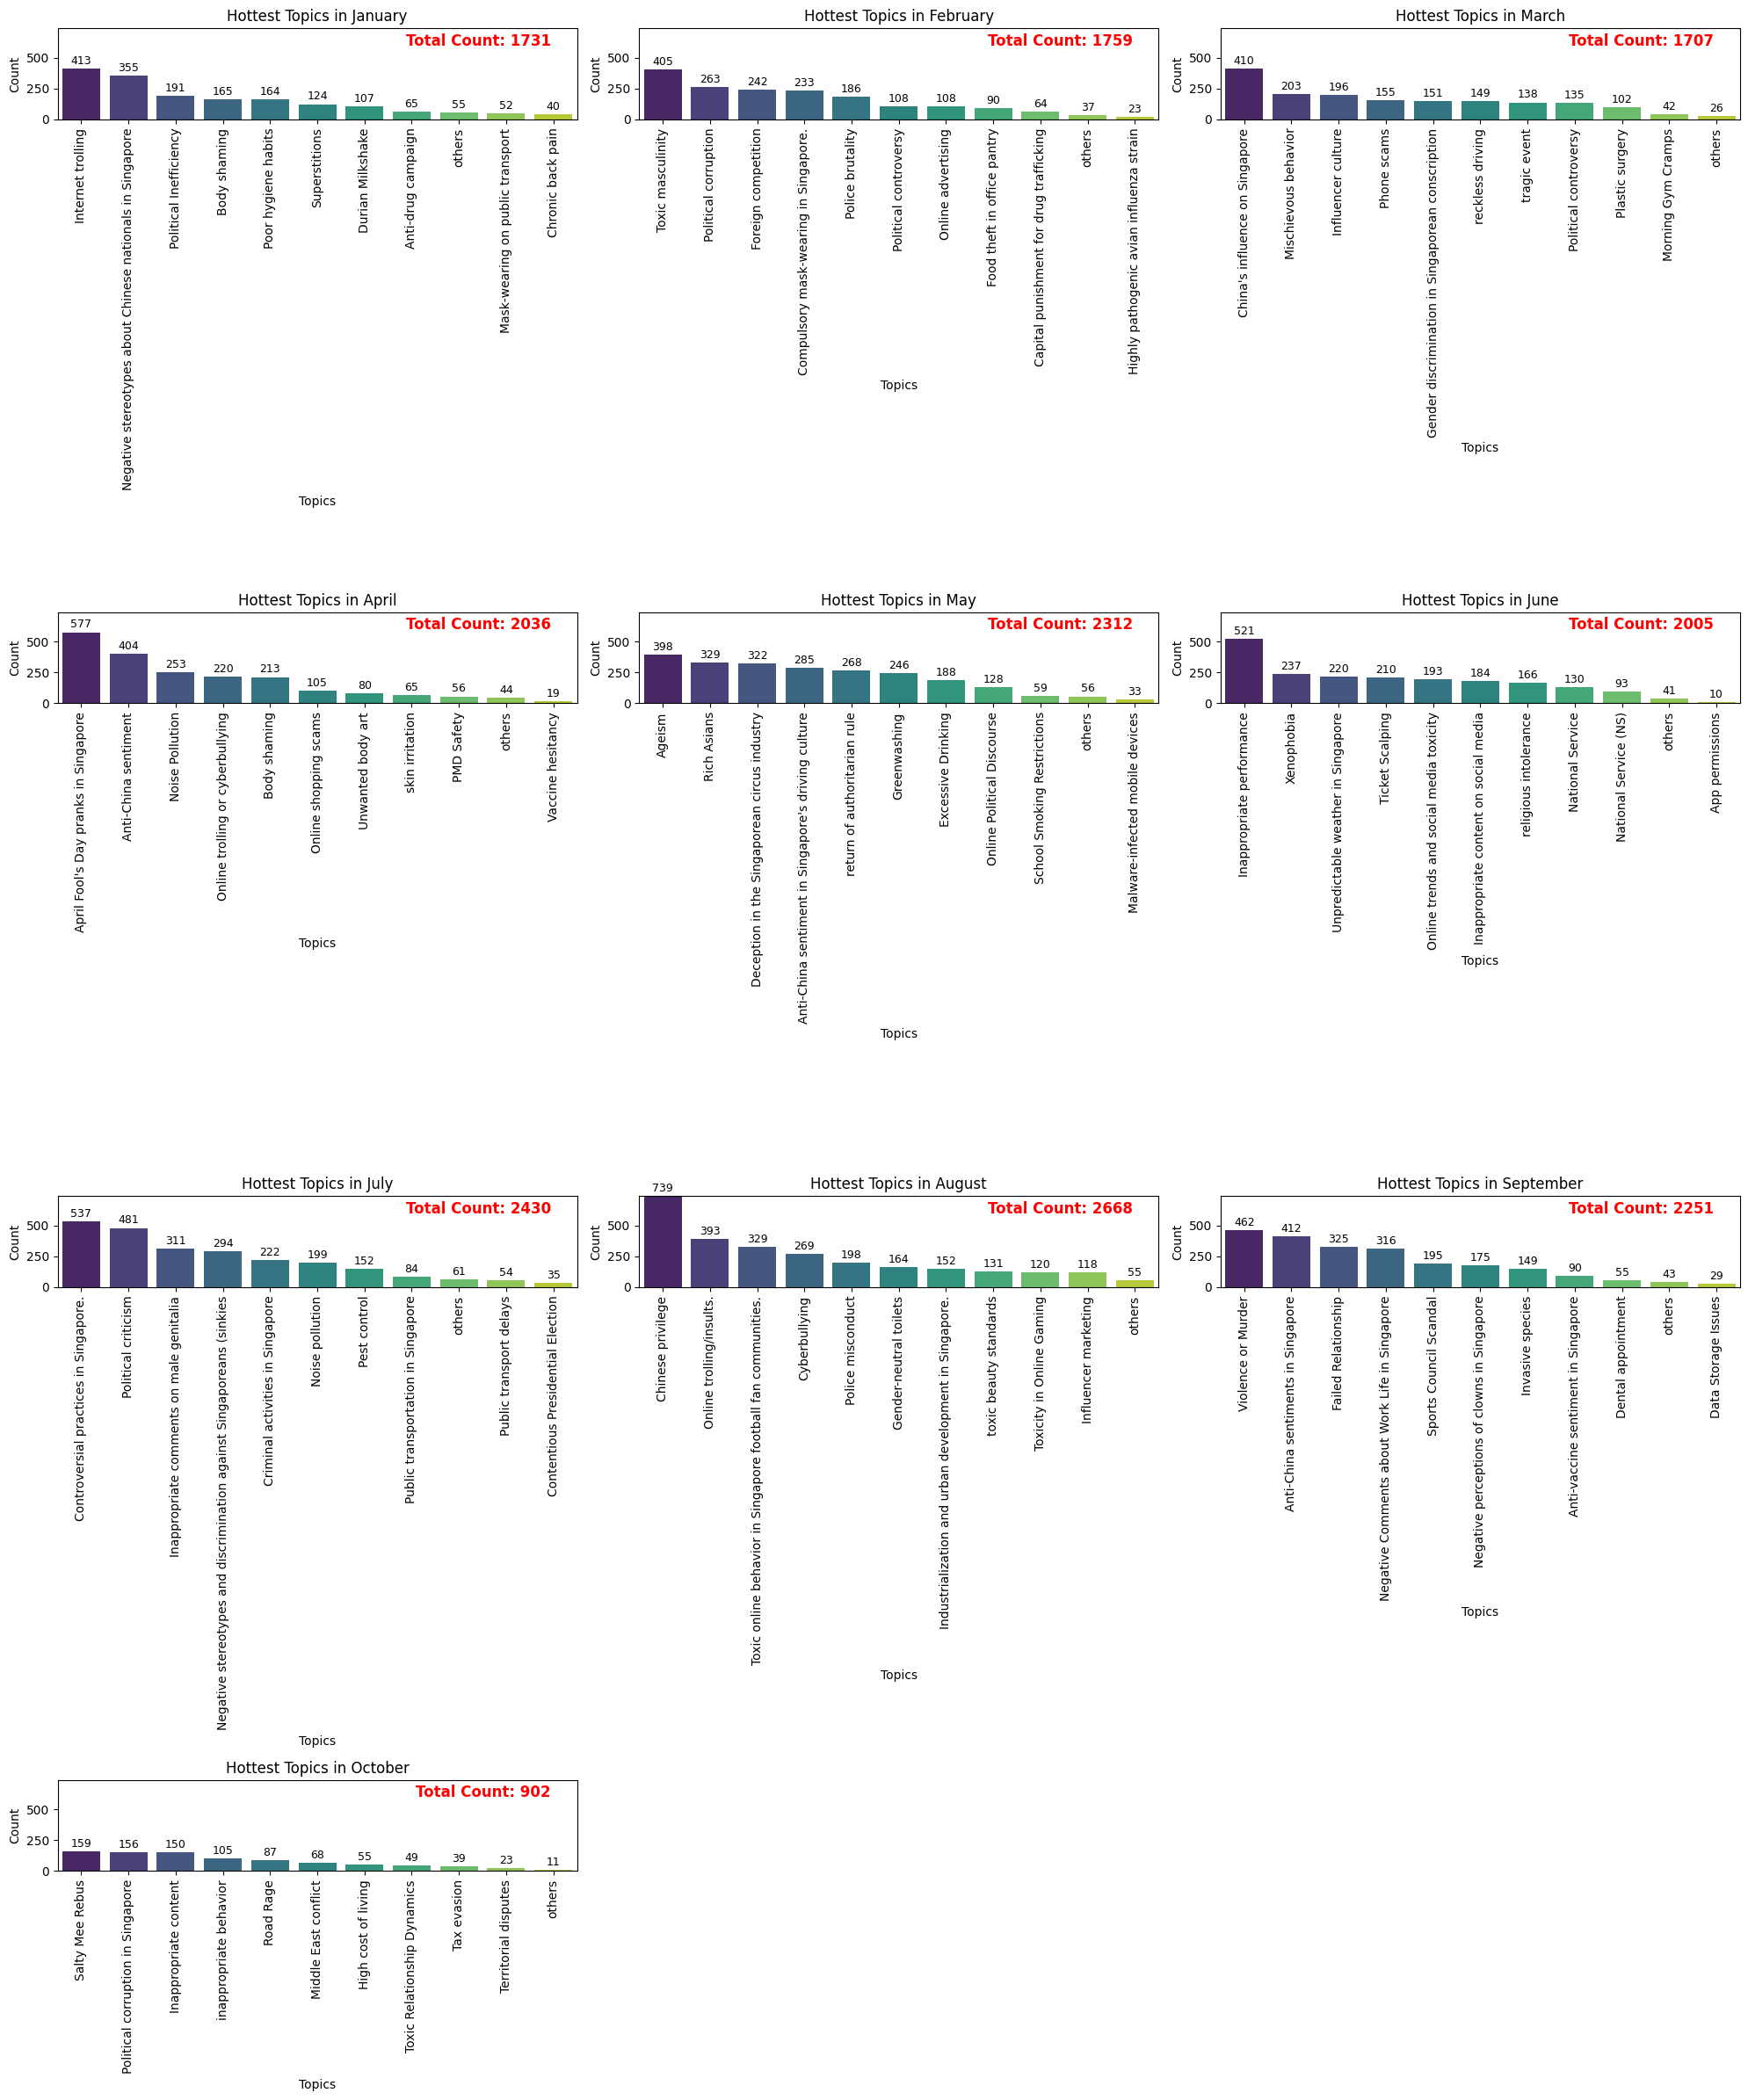

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is available and contains cleaned data
topic_counts_df = pd.DataFrame({
    "Month": topic_counts_df["Month"],
    "Topic": topic_counts_df["Topic"].apply(lambda x: x.strip('"')),  # Remove any lingering quotes if present
    "Count": topic_counts_df["Count"]
})

# Dictionary to store the total toxic counts for each month
total_toxic_counts = {
    "January": len(df_2023_1),
    "February": len(df_2023_2),
    "March": len(df_2023_3),
    "April": len(df_2023_4),
    "May": len(df_2023_5),
    "June": len(df_2023_6),
    "July": len(df_2023_7),
    "August": len(df_2023_8),
    "September": len(df_2023_9),
    "October": len(df_2023_10),
}

# Determine the maximum count for consistent y-axis scaling
max_count = topic_counts_df["Count"].max()

# Get unique months and set up a grid layout
months = topic_counts_df["Month"].unique()
num_months = len(months)
cols = 3  # Set the number of columns you want for the layout
rows = (num_months + cols - 1) // cols  # Calculate rows needed

# Create a figure with subplots arranged in a grid
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))
axes = axes.flatten()  # Flatten the grid for easy iteration

# Set up ExcelWriter to save data for each month
with pd.ExcelWriter("Monthly_Topic_Analysis.xlsx") as writer:
    for idx, month in enumerate(months):
        # Filter data for each month
        month_data = topic_counts_df[topic_counts_df["Month"] == month]
        month_data = month_data.sort_values(by="Count", ascending=False)

        # Save this month's data to a new sheet in the Excel file
        month_data.to_excel(writer, sheet_name=month, index=False)

        # Plot each month's data on the respective subplot
        ax = axes[idx]
        sns.barplot(data=month_data, x="Topic", y="Count", palette="viridis", ax=ax)
        ax.set_title(f"Hottest Topics in {month}")
        ax.set_xlabel("Topics")
        ax.set_ylabel("Count")
        ax.set_ylim(0, max_count)  # Set consistent y-axis limit
        ax.tick_params(axis="x", rotation=90)

        # Add count labels above each bar
        for i, count in enumerate(month_data["Count"]):
            ax.text(i, count + max_count * 0.02, f'{count}', ha='center', va='bottom', fontsize=9, color='black')

        # Get the total toxic count for the current month and add it at the top-right corner
        total_toxic_count = total_toxic_counts[month]
        ax.text(0.95, 0.95, f'Total Count: {total_toxic_count}',
                transform=ax.transAxes, ha='right', va='top', fontsize=12, color='red', fontweight='bold')

    # Hide any empty subplots if the number of months doesn't fill the grid
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    # Save the figure as an image file
    fig.savefig("Monthly_Topic_Analysis.png", dpi=300)

    # Display the figure
    plt.show()

# This code will save the image as "Monthly_Topic_Analysis.png" and display the plot with counts above each bar.
